In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly


In [2]:
elec_use = pd.read_csv("../../data/UNdata_Export_house_elec_use.csv", skipfooter=3, engine='python')
gdp_and_internet_use = pd.read_csv("../../data/gdp_and_internet_use.csv", engine='python')
gdp_df = pd.read_csv("../../data/UNdata_Export_GDP.csv", skipfooter=3, engine='python')

gdp_df = gdp_df.drop(columns='Value Footnotes')
gdp_df.columns=['Country', 'Year', 'GDP_Per_Capita']


elec_use = elec_use.drop(columns=(["Commodity - Transaction", "Unit", "Quantity Footnotes"]))
elec_use.columns=['Country', 'Year', 'Elec Quantity(KWh/mil)']

replace_country_labels = ({"Brunei Darussalam": "Brunei", 
                           "Central African Rep.":"Central African Republic", 
                           "Congo (Democratic Republic of the)":"Dem. Rep. Congo", 
                           "Dominican Rep.":"Dominican Republic", 
                           "Hong Kong, China":"Hong Kong SAR, China", 
                           "Iran (Islamic Rep. of)":"Iran", 
                           "Korea (Rep. of)":"Korea", 
                           "Kyrgyzstan":"Kyrgyz Republic", 
                           "Lao P.D.R.":"Lao PDR", 
                           "Macao, China":"Macao SAR, China", 
                           "Micronesia (Fed. States of)":"Micronesia", 
                           "Viet Nam":"Vietnam"})
elec_use = elec_use.replace({"Country": replace_country_labels})

elec_use


,Country,Year,Elec Quantity(KWh/mil)
0,Afghanistan,2019,3020.0
1,Afghanistan,2018,2952.0
2,Afghanistan,2017,2811.8
3,Afghanistan,2016,2729.9
4,Afghanistan,2015,2220.2
...,...,...,...
6305,Zimbabwe,1994,1608.0
6306,Zimbabwe,1993,1566.0
6307,Zimbabwe,1992,1572.0
6308,Zimbabwe,1991,1549.0


In [3]:
gdp_internet_elec = pd.merge(gdp_and_internet_use, elec_use, on=["Country", "Year"])
gdp_elec = pd.merge(gdp_df, elec_use, on=["Country", "Year"])

#gdp_internet_elec = gdp_and_internet_use.drop(columns="Unnamed: 0")
gdp_internet_elec

,Unnamed: 0,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,Elec Quantity(KWh/mil)
0,0,Afghanistan,2014,2102.385234,Asia,6.390000,2204.9
1,1,Afghanistan,2013,2116.465454,Asia,5.900000,1933.7
2,2,Afghanistan,2012,2075.491747,Asia,5.454545,1922.0
3,3,Afghanistan,2011,1904.559799,Asia,5.000000,1620.0
4,4,Afghanistan,2010,1957.029338,Asia,4.000000,1387.0
...,...,...,...,...,...,...,...
3337,3705,Zimbabwe,1997,3580.048793,Africa,0.033080,1991.0
3338,3706,Zimbabwe,1996,3520.430146,Africa,0.016790,1831.0
3339,3707,Zimbabwe,1995,3226.413930,Africa,0.007684,1672.0
3340,3708,Zimbabwe,1994,3263.934978,Africa,0.001739,1608.0


<AxesSubplot:xlabel='Year'>

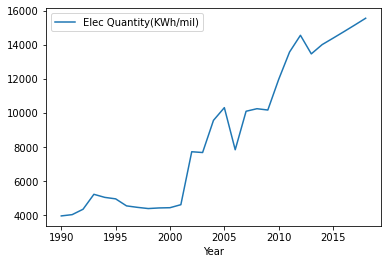

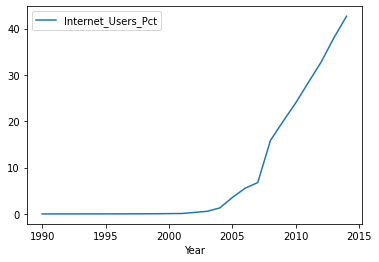

In [4]:
elec_use[elec_use["Country"].isin(["Nigeria"])].pivot_table(values="Elec Quantity(KWh/mil)",index=["Year"]).plot()
gdp_and_internet_use[gdp_and_internet_use["Country"].isin(["Nigeria"])].pivot_table(values="Internet_Users_Pct",index=["Year"]).plot()


In [5]:
internet_pivot = gdp_internet_elec[gdp_internet_elec["Year"].isin([2000, 2014])].pivot_table(values="Internet_Users_Pct", index="Continent", columns='Year')
internet_pivot.head()

Year,2000,2014
Continent,,
Africa,0.854965,17.065952
Asia,5.938910,43.259999
Europe,18.545497,73.277895
North America,10.896589,53.755909
Oceania,10.174527,33.540000


In [6]:
internet_pivot["Percent_Change"] = (internet_pivot[2014] - internet_pivot[2000]) / internet_pivot[2000] * 100
internet_pivot.sort_values("Percent_Change", ascending=False)

Year,2000,2014,Percent_Change
Continent,,,
Africa,0.854965,17.065952,1896.099396
South America,5.366011,51.231000,854.731524
Asia,5.938910,43.259999,628.416478
North America,10.896589,53.755909,393.327846
Europe,18.545497,73.277895,295.124992
Oceania,10.174527,33.540000,229.646761


<AxesSubplot:xlabel='Year'>

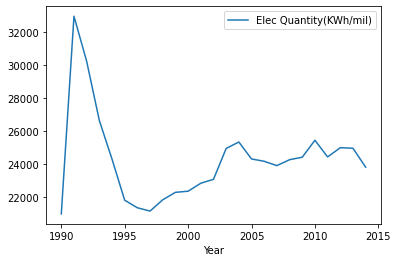

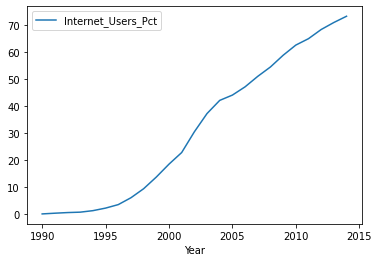

In [7]:
gdp_internet_elec[gdp_internet_elec["Continent"].isin(["Europe"])].pivot_table(values="Elec Quantity(KWh/mil)",index=["Year"]).plot()
gdp_internet_elec[gdp_internet_elec["Continent"].isin(["Europe"])].pivot_table(values="Internet_Users_Pct",index=["Year"]).plot()


In [8]:
africa_values = gdp_internet_elec[gdp_internet_elec['Continent'].isin(['Africa'])]
africa_values_1993 = africa_values[africa_values["Year"].isin([1993])]
africa_values_1993[africa_values_1993["Elec Quantity(KWh/mil)"] > 2500]
africa_1994 = africa_values[africa_values['Year'].isin([1994])] 
africa_1994


,Unnamed: 0,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,Elec Quantity(KWh/mil)
54,54,Algeria,1994,7792.085182,Africa,0.000361,7608.0
557,581,Burundi,1994,1044.715537,Africa,0.000000,51.0
957,1027,Egypt,1994,6321.250708,Africa,0.006383,15943.0
1290,1363,Guinea,1994,1565.294028,Africa,0.000138,100.0
2714,2980,Sierra Leone,1994,1206.396042,Africa,0.000000,44.0
2805,3094,South Africa,1994,9453.161454,Africa,0.246906,22115.0
3003,3350,Togo,1994,1148.260641,Africa,0.000000,130.0
3055,3417,Tunisia,1994,5896.959347,Africa,0.007380,1622.0
3318,3686,Zambia,1994,1902.393940,Africa,0.006776,571.0
3340,3708,Zimbabwe,1994,3263.934978,Africa,0.001739,1608.0


In [9]:
#pd.DataFrame(elec_use["Year"].value_counts()).sort_values()
#elec_use["Year"].value_counts()
#elec_use["Year"].plot()

In [10]:
africa_subset = africa_1994['Country'].value_counts().index.tolist()
africa_subset

['Zimbabwe',
 'Tunisia',
 'Burundi',
 'Zambia',
 'Guinea',
 'Egypt',
 'Sierra Leone',
 'Togo',
 'Algeria',
 'South Africa']

In [11]:
africa_all_subset = gdp_internet_elec[gdp_internet_elec["Country"].isin(africa_subset)]

africa_all_subset = africa_all_subset[africa_all_subset['Year'] > 1993]

<AxesSubplot:xlabel='Year'>

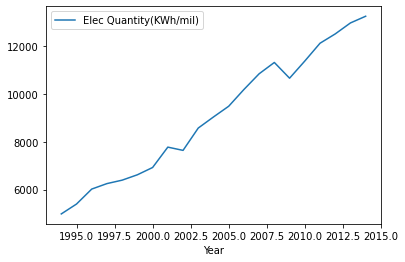

In [12]:
africa_all_subset.pivot_table(values="Elec Quantity(KWh/mil)",index=["Year"]).plot()

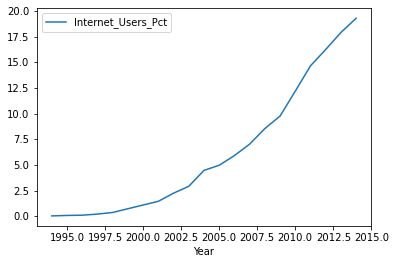

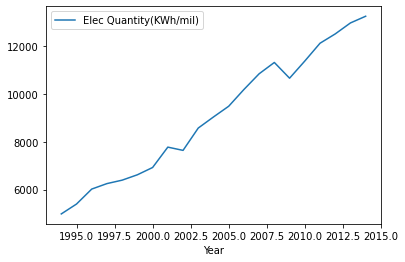

In [14]:
africa_all_subset_int = africa_all_subset.pivot_table(values='Internet_Users_Pct', index='Year').plot()
africa_all_subset_elec = africa_all_subset.pivot_table(values='Elec Quantity(KWh/mil)', index='Year').plot()
plt.show()

<AxesSubplot:xlabel='Internet_Users_Pct', ylabel='Elec Quantity(KWh/mil)'>

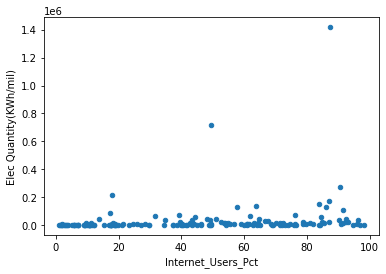

In [17]:
gdp_internet_elec_2014 = gdp_internet_elec[gdp_internet_elec['Year'].isin([2014])]
gdp_internet_elec_2014.plot("Internet_Users_Pct", "Elec Quantity(KWh/mil)", kind='scatter')